In [1]:
import os
import sys
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

sys.path.append("/home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee")
from src.setup import setup_python, setup_pytorch
from src.dataset import RGBDObjectDataset, RGBDObjectDataset_Supervised_Contrast
from src.models.combined_model import CombinedModel, train, test

/home/self_supervised_learning_gr/self_supervised_learning/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
setup_python()

sys.version = 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
os.getcwd() = /home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee


In [3]:
DEVICE = setup_pytorch()

torch.__version__ = 1.12.1+cu113
torch.backends.cudnn.version() = 8302
torch.version.cuda = 11.3
DEVICE = cuda:0


In [5]:
BATCH_SIZE = 10 # Batch size
INPUT_SIZE = (128,128)
TRANSFORMATION = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(size=INPUT_SIZE)])
NB_TEST_SAMPLES = 100

test_dataset = RGBDObjectDataset_Supervised_Contrast(path="data/RGB-D_Object/rgbd-dataset",
                                          mode="test",
                                          transformation=TRANSFORMATION,
                                          nb_samples=NB_TEST_SAMPLES)

test_data_loader = DataLoader(test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

In [6]:
model = CombinedModel().to(DEVICE)

In [7]:
# Run inference
encoded_features = []
labels = []
with torch.no_grad():
    for i, batch in enumerate(test_data_loader):
        
        # Load and prepare batch
        p_data_1, p_data_2, n_data = batch
        p_rgb_1, p_depth_1, p_mask_1, p_loc_x_1, p_loc_y_1, p_label_1 = p_data_1
        p_rgb_1 = p_rgb_1.to(DEVICE)
        # p_depth_1 = p_depth_1.to(DEVICE)
        # p_mask_1 = p_mask_1.to(DEVICE)
        # p_loc_x_1 = p_loc_x_1.to(DEVICE)
        # p_loc_y_1 = p_loc_y_1.to(DEVICE)
        p_label_1 = p_label_1.to(DEVICE)
        # p_rgb_2, p_depth_2, p_mask_2, p_loc_x_2, p_loc_y_2, p_label_2 = p_data_2
        # p_rgb_2 = p_rgb_2.to(DEVICE)
        # p_depth_2 = p_depth_2.to(DEVICE)
        # p_mask_2 = p_mask_2.to(DEVICE)
        # p_loc_x_2 = p_loc_x_2.to(DEVICE)
        # p_loc_y_2 = p_loc_y_2.to(DEVICE)
        # p_label_2 = p_label_2.to(DEVICE)
        # n_rgb, n_depth, n_mask, n_loc_x, n_loc_y, n_label = n_data
        # n_rgb = n_rgb.to(DEVICE)
        # n_depth = n_depth.to(DEVICE)
        # n_mask = n_mask.to(DEVICE)
        # n_loc_x = n_loc_x.to(DEVICE)
        # n_loc_y = n_loc_y.to(DEVICE)
        # n_label = n_label.to(DEVICE)
        
        # Make predictions for batch
        encoded_x, predicted_label = model(p_rgb_1)

        # Save encoded features and labels
        encoded_features.append(encoded_x)
        labels.append(p_label_1)

In [8]:
print(len(encoded_features))
print(encoded_features[0].shape)
print(encoded_features[0])

10
torch.Size([10, 4096])
tensor([[0.0000, 0.0520, 0.0000,  ..., 0.0000, 0.0000, 1.4352],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.2603],
        [0.1032, 0.0000, 0.5150,  ..., 0.0000, 0.2359, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0047,  ..., 0.0000, 1.1724, 0.0000],
        [0.0165, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.9309, 0.4725, 0.0000,  ..., 0.0000, 0.3355, 0.0000]],
       device='cuda:0')


In [9]:
encoded_features_arr = torch.empty(size=(NB_TEST_SAMPLES, 4096))
print(encoded_features_arr.shape)
print(encoded_features_arr)
for i, batch in enumerate(encoded_features):
    encoded_features_arr[i * BATCH_SIZE:(i + 1) * BATCH_SIZE,:] = batch
print(encoded_features_arr.shape)
print(encoded_features_arr)

torch.Size([100, 4096])
tensor([[5.8617e-34, 0.0000e+00, 1.2748e+25,  ..., 3.5294e-01, 3.5980e-01,
         3.5147e-01],
        [1.5588e-01, 1.7206e-01, 1.5441e-01,  ..., 3.7892e-01, 3.5735e-01,
         3.6618e-01],
        [1.6961e-01, 1.6618e-01, 1.9216e-01,  ..., 2.9510e-01, 2.8873e-01,
         2.7843e-01],
        ...,
        [9.0882e-01, 9.0343e-01, 8.9167e-01,  ..., 5.9755e-01, 5.9461e-01,
         5.9216e-01],
        [6.0000e-01, 6.0245e-01, 5.8186e-01,  ..., 8.1569e-01, 8.1863e-01,
         8.1863e-01],
        [8.2353e-01, 8.1078e-01, 8.1029e-01,  ..., 4.3627e-01, 4.2451e-01,
         4.3039e-01]])
torch.Size([100, 4096])
tensor([[0.0000, 0.0520, 0.0000,  ..., 0.0000, 0.0000, 1.4352],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.2603],
        [0.1032, 0.0000, 0.5150,  ..., 0.0000, 0.2359, 0.0000],
        ...,
        [0.2166, 0.0000, 0.2228,  ..., 0.0000, 0.7396, 0.3502],
        [0.0000, 0.0000, 0.6701,  ..., 0.0000, 0.0000, 1.3662],
        [0.0642, 0.0000

In [10]:
print(len(labels))
print(labels[0].shape)
print(labels[0])

10
torch.Size([10])
tensor([36, 29, 29, 17, 36, 20,  5,  9, 11, 15], device='cuda:0')


In [11]:
labels_arr = torch.empty(size=(NB_TEST_SAMPLES,))
print(labels_arr.shape)
print(labels_arr)
for i, batch in enumerate(labels):
    labels_arr[i * BATCH_SIZE:(i + 1) * BATCH_SIZE] = batch
print(labels_arr.shape)
print(labels_arr)

torch.Size([100])
tensor([-3.6765e-31,  4.5806e-41, -3.6765e-31,  4.5806e-41,  1.4013e-45,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  7.9095e+24,  0.0000e+00,  3.2477e-36,
         0.0000e+00, -2.9201e+00,  4.5804e-41,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         5.6052e-45,  0.0000e+00,  1.4013e-45,  0.0000e+00,  9.1844e-41,
         1.1551e-40,  1.1481e-41,  2.0739e-43,  2.9147e-43,  0.0000e+00,
         6.7262e-44,  0.0000e+00,  7.9377e-34,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  4.6243e-44,  0.0000e+00,  7.9382e-34,
         0.0000e+00,  7.9530e-34,

In [12]:
# Apply TSNE
tsne = TSNE(n_components=2,
            perplexity=30,
            n_iter=1000,
            init="pca",
            random_state=42)

In [13]:
tsne_results = tsne.fit_transform(encoded_features_arr)

In [14]:
print(type(tsne_results))
print(tsne_results.shape)

<class 'numpy.ndarray'>
(100, 2)


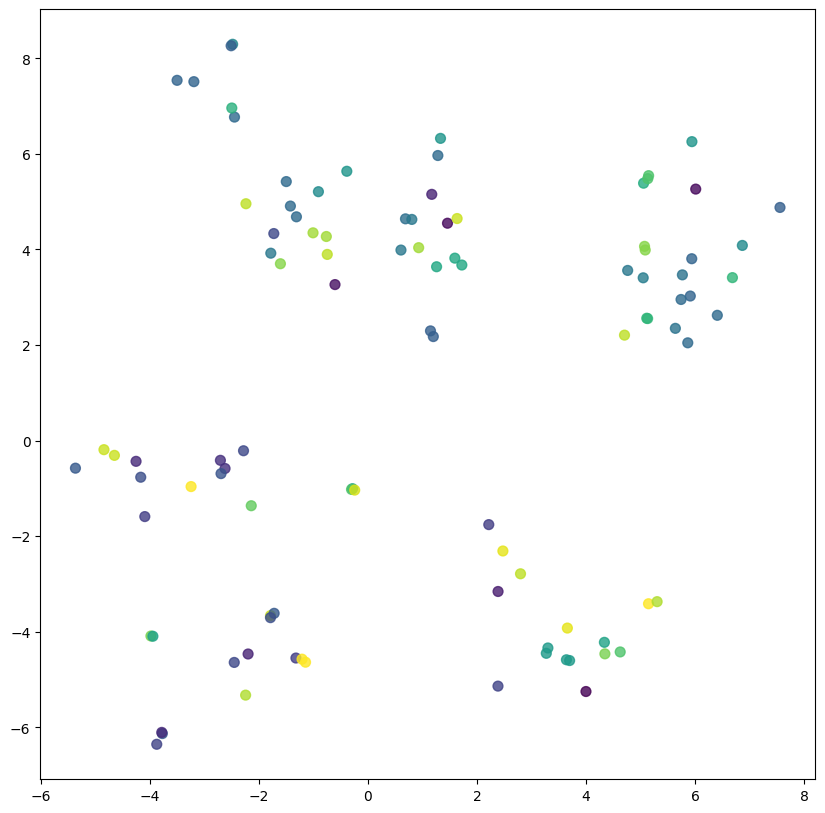

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tsne_results[:,0], tsne_results[:,1], c=labels_arr, s=50, alpha=0.8)